In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
#loading data
data=pd.read_csv("iris.data",header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#assiging column names
#measurements are in cm 
col=['sepal_length','sepal_width','petal_length','petal_width','class']
data.columns=col
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(149, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [16]:
data['class'].unique(), data.dtypes

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 class            object
 dtype: object)

In [17]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\anves\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


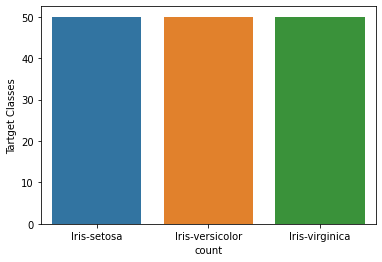

In [22]:
sns.countplot(data['class'], data= data)
plt.xlabel('count')
plt.ylabel('Tartget Classes')
plt.show()

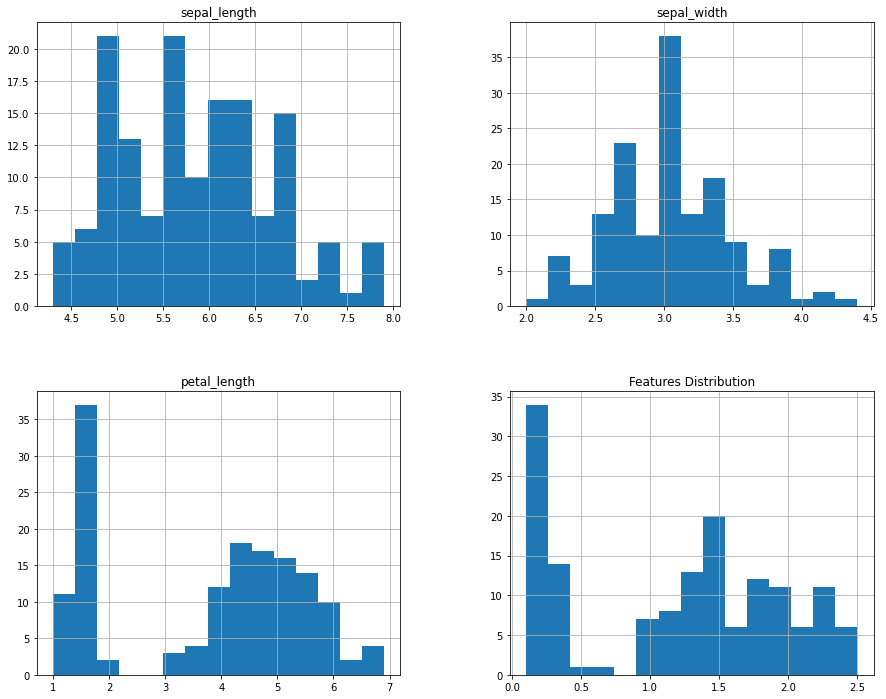

In [24]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [25]:
#checking for correlation
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

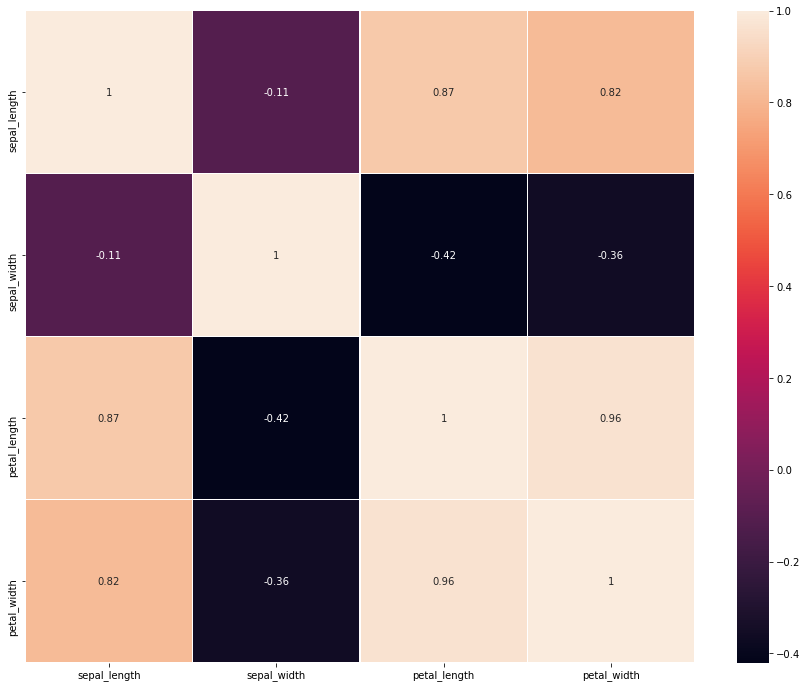

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True, linewidths=0.2)

In [36]:
#splitting data into train and test
X=data.drop(['class'],axis=1)
y=data['class']
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.3,random_state=1)

In [37]:
#Model Building
#KN Model
K_model=KNeighborsClassifier()
K_model.fit(X_train,y_train)
#logistic Regression
Log_model=LogisticRegression()
Log_model.fit(X_train,y_train)




C:\Users\anves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
#predcition using KN model
K_pred=K_model.predict(X_val)


In [42]:
# calculating accuracy, confusion matric and finding the classification report of KNN model
print("Confusion Matrix of KNN model : \n ",confusion_matrix(y_val, K_pred))
print("\n Accuracy Score of KNN model: \n ",accuracy_score(y_val, K_pred))
print("\n Classification Report of KNN model : \n",classification_report(y_val, K_pred))

Confusion Matrix of KNN model : 
  [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

 Accuracy Score of KNN model: 
  0.9777777777777777

 Classification Report of KNN model : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [41]:
#pediction using Logistic Regression
Log_pred=Log_model.predict(X_val)

In [45]:
# calculating accuracy, confusion matric and finding the classification report of Logistic Regression Model
print("Confusion Matrix of logistic regression: \n ",confusion_matrix(y_val, Log_pred))
print("\n Accuracy Score logistic regression: \n ",accuracy_score(y_val, Log_pred))
print("\n Classification Report logistci regression: \n",classification_report(y_val, Log_pred))

Confusion Matrix of logistic regression: 
  [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 Accuracy Score logistic regression: 
  0.9777777777777777

 Classification Report logistci regression: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

